In [1]:
from sentence_transformers import SentenceTransformer, util
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import time
import torch

import pymorphy2
import re
import spacy

from string import punctuation

data_path = "data/"

import os
print(os.cpu_count())

64


In [2]:
df = pd.read_parquet(data_path+"keywords/df_keywords.parquet.gzip")
print(df.shape)

(1811222, 13)


In [3]:
with open(data_path+"embeddings_dict.pkl", "rb") as pickle_file:
    embeddings_dict =  pickle.load(pickle_file)
print(len(embeddings_dict))

186293


In [4]:
df["embeddings"] = df.keywords.map(embeddings_dict)
df = df[df.embeddings.notna()].reset_index(drop=True)
print(df.shape)

(677792, 14)


# all at once

In [ ]:
st = time.time()

tsne = TSNE(n_components=2, random_state=42, perplexity=500.0)
x = tsne.fit_transform(np.array(list(df.embeddings), dtype=float))
print(x.shape)

plt.figure(figsize=(17, 8))
plt.scatter(x[:, 0], x[:, 1])
plt.show()

print(f"time: {time.time() - st}")

In [1]:
print(1)

1


(251351,) 6223
time: 3.6180830001831055


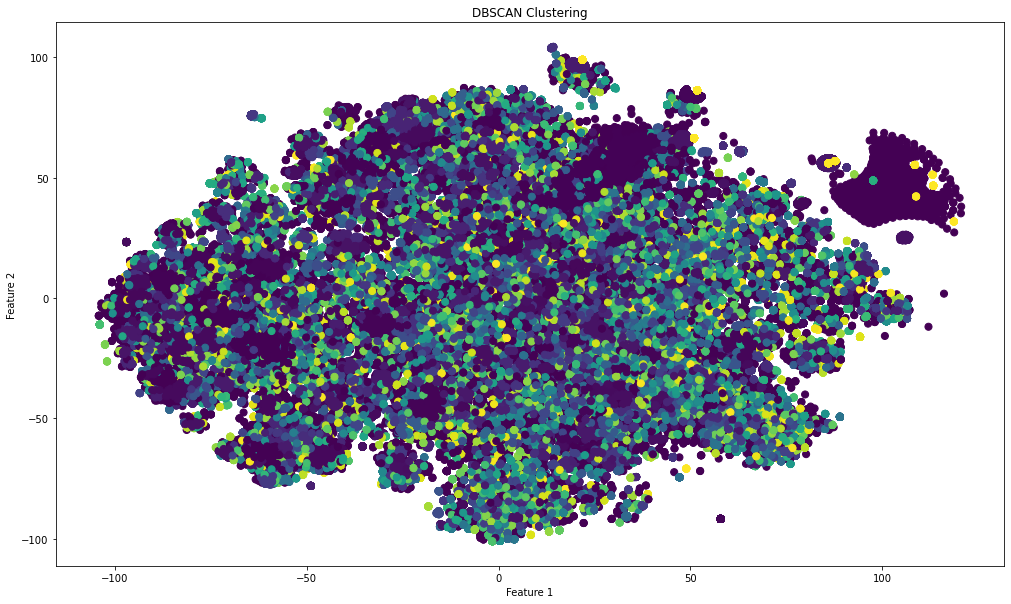

In [24]:
st = time.time()

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(x)
print(labels.shape, len(set(labels)))
df["group"] = labels
print(f"time: {time.time() - st}")

plt.figure(figsize=(17, 10))
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap=plt.cm.get_cmap("viridis", np.max(labels) + 1), s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [110]:
df.to_parquet(data_path+"df_cluster.parquet.gzip", index=False, compression="gzip")

In [26]:
df.shape, len(set(labels))

((251351, 15), 6223)

In [104]:
df.group.sample(1)

46666    580
Name: group, dtype: int64

In [108]:
df[df.group == 1]

,id,title,description,price,discount_price,supplier_id,review_rating,review_number,stock_qty,sale_qty,revenue,category_id,keywords,embeddings,group
2,13712375,Лагман классический 1кг Макароны Лапша домашняя,"Лагман классический, ручной работы, изготовлен...",1123.0,527.0,10653,4.4,101,16,0,0.0,128595,классический ручной работа гост натуральный пр...,"[0.05106827, -0.037240095, -0.018893749, -0.03...",1
1062,114250348,"Чеснок сушеный молотый, 200 гр",Чеснок сушеный гранулированный это продукт пи...,327.0,196.0,535755,4.9,89,58,0,0.0,128328,чеснок сушёный гранулированный продукт питание...,"[0.02303123, -0.05393575, -0.021347364, -0.058...",1
1522,17588901,Готовый булгур с киноа 250г,Блюдо готовое стерилизованное готовый булгур ...,90.0,72.0,39886,4.5,136,140,0,0.0,130732,блюдо готовый стерилизовать готовый булгур кин...,"[0.040024556, -0.02502496, -0.03654069, -0.043...",1
1840,167966328,"Филе индейки по-болгарски, ПРЕМИУМ, 300 г",Готовые консервированные вторые блюда с мясом ...,390.0,351.0,934118,5.0,1,197,0,0.0,130732,готовый консервированный второй блюдо мясо тра...,"[0.047741555, -0.049170732, -0.021259213, -0.0...",1
1848,150572841,Лапша быстрого приготовления Tempura Udon Big ...,Хотите попробовать чтото новое и удивительно в...,560.0,224.0,318554,3.9,13,138,0,0.0,128595,чтоть новый вкусный лапша неповторимый сочетан...,"[0.014398325, -0.016429532, 0.008298086, -0.04...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66758,169092827,Плов узбекский с говядиной реторт-пакет,Готовые блюда Поедим! Вкусно как дома. Еда гот...,1003.0,401.0,83691,0.0,0,14,0,0.0,130732,готовый блюдо поесть вкусно еда готовый удобно...,"[0.027539603, -0.031686142, -0.0062374477, -0....",1
69185,90803199,Плов овощной с ГРИБАМИ 340 г 2шт,"Вкусная тушенка выручит вас в походе, на даче ...",675.0,405.0,862264,4.6,19,4,0,0.0,130732,вкусный тушёнка поход дача время приготовление...,"[0.030596178, -0.036542837, -0.009644501, -0.0...",1
71498,137628902,Свинина тушеная 325г,Тушенка свиная Сохраним традиции ВЫСШИЙ СОРТ Э...,522.0,313.0,945923,4.8,26,10,0,0.0,62466,тушёнка свиной традиция вкусный питательный пр...,"[0.03667387, -0.028774662, -0.023037774, -0.03...",1
74362,75979063,Говядина тушеная ПРЕМИУМ 325 г х 3 шт,Вкусная Белорусская Тушенка ПРЕМИУМ Оршанского...,1973.0,966.0,733245,4.6,20,16,0,0.0,62466,вкусный белорусский оршанский тушёнка говядина...,"[0.030444536, -0.015867544, -0.01696515, -0.02...",1


# loop by category

In [10]:
df_done = pd.read_parquet(data_path+"labeled/_unos_df_labeled.parquet.gzip")
print(df_done.shape)
df = df[~df.id.isin(df_done.id)].reset_index(drop=True)
print(df.shape)

(3654, 15)
(334839, 14)


In [ ]:
df_labeled = pd.DataFrame(dtype=object)

cnt = 0

for cid in df.category_id.unique():
    
    dfc = df[df.category_id == cid].reset_index(drop=True)

    with open(data_path+"logs.txt", "a") as f:
        f.write(f"cid: {cid}, shape: {dfc.shape}\n")
        
    if len(dfc) == 1:
        continue
    elif len(dfc) > 0 and len(dfc) < 40:
        tsne = TSNE(n_components=2, random_state=42, perplexity=len(dfc)//2)
    else:
        tsne = TSNE(n_components=2, random_state=42)#, perplexity=500.0)
    x = tsne.fit_transform(np.array(list(dfc.embeddings), dtype=float))
    
    dbscan = DBSCAN(eps=1, min_samples=5)
    labels = dbscan.fit_predict(x)
    with open(data_path+"logs.txt", "a") as f:
        f.write(f"len labels: {len(set(labels))}\n")
    labels_str = [str(cid)+"_"+str(x) for x in labels]
    dfc["group"] = labels_str
    with open(data_path+"logs.txt", "a") as f:
        f.write(f"values count: {dfc.group.value_counts()[:5].to_dict()}\n\n")
        
    df_labeled = pd.concat([df_labeled, dfc]).reset_index(drop=True)
    if cnt % 10 == 0:
        df_labeled.to_parquet(data_path+f"labeled/{cnt}_df_labeled.parquet.gzip", index=False, compression="gzip")
    cnt += 1

In [ ]:
print(1)